Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Iswaryaah Balakrishnan"

# Assignment 3 - Linear Regression

In this assignment, we will be building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


Complete the following:

**Data Preparation**

**Question 1** _(3 points)_
* Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

**Question 2** _(3 points)
* Create a new column which captures the age of the car as 'new' or 'old'.

**Question 3** _(3 points)
* Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

**Exploratory Analysis**

**Question 4** _(3 points)_
* Conduct exploratory analysis for the categorical variables. What are you findings?

**Question 5** _(10 points)_
* Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?


**Regression Model**

**Question 6** _(1 point)_
* Based on the insights identified, state a hypothesis which you can test with a regression model.  

**Question 7** _(5 points)_
* Build a linear regression model based on your hypothesis. Interpret the results.

**Question 8** _(2 points)_
* How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

In [3]:
car_data = pd.read_csv('car_data.csv', header = 0, sep = ',')
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.isnull().values.any() 

False

In [5]:
car_data.shape

(301, 9)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### 1 (3 points) Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

In [8]:
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [9]:
fuel_type_dummies = pd.get_dummies(car_data['Fuel_Type'])

In [10]:
fuel_type_dummies.rename(columns={'Fuel_Type':'Petrol','Fuel_Type':'Diesel','Fuel_Type':'CNG'}, inplace=True)

In [11]:
car_data = pd.concat([car_data, fuel_type_dummies], axis=1)

In [12]:
#car_data.drop("Fuel_Type", axis=1, inplace=True)

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0


In [14]:
car_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
transmission_dummies = pd.get_dummies(car_data['Transmission'])

In [16]:
transmission_dummies.rename(columns={'Transmission':'Manual','Transmission':'Automatic'}, inplace=True)

In [17]:
car_data = pd.concat([car_data, transmission_dummies], axis=1)

In [18]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1


In [19]:
car_data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [20]:
seller_type_dummies = pd.get_dummies(car_data['Seller_Type'])

In [21]:
seller_type_dummies.rename(columns={'Seller_Type':'Dealer','Seller_Type':'Individual'}, inplace=True)

In [22]:
car_data = pd.concat([car_data, seller_type_dummies], axis=1)

In [23]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0


### 2 (3 points) Create a new column which captures the age of the car as 'new' or 'old'.

In [24]:
conditions = [(car_data['Year']<2016), (car_data['Year']>=2016)]
choices = [1,0]
   
car_data['< 2016'] = np.select(conditions, choices, default='1')

In [25]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,1


### 3 (3 points) Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

In [26]:
car_data['Kms_Driven']=car_data['Kms_Driven']/(car_data['Kms_Driven'].max())*100
car_data['Selling_Price']=car_data['Selling_Price']/(car_data['Selling_Price'].max())*100
car_data['Present_Price']=car_data['Present_Price']/(car_data['Present_Price'].max())*100

In [27]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016
0,ritz,2014,9.571429,6.036717,5.40,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,1
1,sx4,2013,13.571429,10.302376,8.60,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,1
2,ciaz,2017,20.714286,10.637149,1.38,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,0
3,wagon r,2011,8.142857,4.481641,1.04,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,1
4,swift,2014,13.142857,7.419006,8.49,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,1


### 4 (3 points) Conduct exploratory analysis for the categorical variables. What are you findings?

In [28]:
car_data.describe(include='all')
# The cars in our dataset were manufactured between 2003 and 2018
# Most of the cars in our dataset (239 out 301) are petrol cars
# Most of the cars in our dataset (195 out 301) were sold through a dealer
# Most of the cars in our dataset (261 out 301) are manual cars
# The lowest number of owners is 0 and the highest number of owners is 3 per car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215
mean,NaN,2013.627907,13.317988,8.238090,7.389441,NaN,NaN,NaN,0.043189,0.006645,0.199336,0.794020,0.132890,0.867110,0.647841,0.352159,NaN
std,NaN,2.891554,14.522319,9.334898,7.777377,NaN,NaN,NaN,0.247915,0.081378,0.400166,0.405089,0.340021,0.340021,0.478439,0.478439,NaN
min,NaN,2003.000000,0.285714,0.345572,0.100000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2012.000000,2.571429,1.295896,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
50%,NaN,2014.000000,10.285714,6.911447,6.400000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,NaN
75%,NaN,2016.000000,17.142857,10.691145,9.753400,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

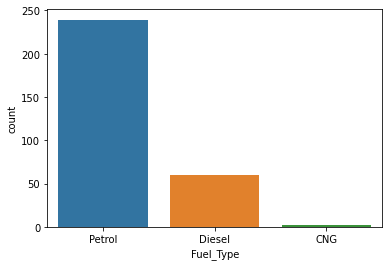

In [29]:
sns.countplot(data = car_data, x = 'Fuel_Type')

In [30]:
car_data.groupby(['Fuel_Type'])['Fuel_Type'].count().to_frame()

,Fuel_Type
Fuel_Type,
CNG,2
Diesel,60
Petrol,239


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

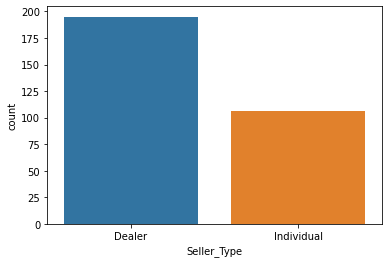

In [31]:
sns.countplot(data = car_data, x = 'Seller_Type')

In [32]:
car_data.groupby(['Seller_Type'])['Seller_Type'].count().to_frame()

,Seller_Type
Seller_Type,
Dealer,195
Individual,106


<AxesSubplot:xlabel='Transmission', ylabel='count'>

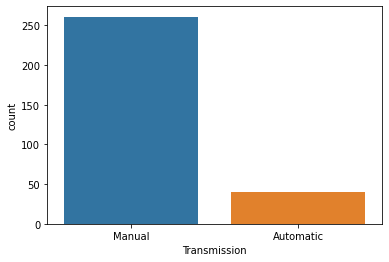

In [33]:
sns.countplot(data = car_data, x = 'Transmission')

In [34]:
car_data.groupby(['Transmission'])['Transmission'].count().to_frame()

,Transmission
Transmission,
Automatic,40
Manual,261


<AxesSubplot:xlabel='Owner', ylabel='count'>

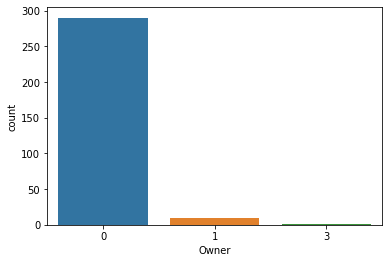

In [35]:
sns.countplot(data = car_data, x = 'Owner')

In [36]:
car_data.groupby(['Owner'])['Owner'].count().to_frame()

,Owner
Owner,
0,290
1,10
3,1


<AxesSubplot:xlabel='< 2016', ylabel='count'>

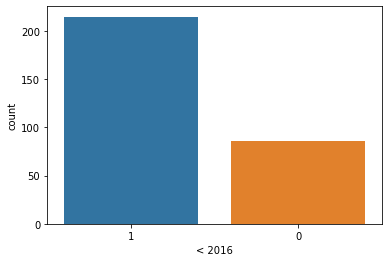

In [37]:
sns.countplot(data = car_data, x = '< 2016')

In [38]:
car_data.groupby(['< 2016'])['< 2016'].count().to_frame()

,< 2016
< 2016,
0,86
1,215


Findings

Most of the cars in this data set were manufactured before 2016, have no owners, have a fuel type of petrol, have manual transmission and were sold through a dealer. 

### 5 (10 points) Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?

In [39]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,13.317988,8.238090,7.389441,0.043189,0.006645,0.199336,0.794020,0.132890,0.867110,0.647841,0.352159
std,2.891554,14.522319,9.334898,7.777377,0.247915,0.081378,0.400166,0.405089,0.340021,0.340021,0.478439,0.478439
min,2003.000000,0.285714,0.345572,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.571429,1.295896,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2014.000000,10.285714,6.911447,6.400000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,2016.000000,17.142857,10.691145,9.753400,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,100.000000,100.000000,100.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'CNG', 'Diesel',
       'Petrol', 'Automatic', 'Manual', 'Dealer', 'Individual', '< 2016'],
      dtype='object')

In [41]:
car_data['Selling_Price'].aggregate(['min','max','median','mean'])
# Mean and median are somewhat close, but we'll check for outliers

min         0.285714
max       100.000000
median     10.285714
mean       13.317988
Name: Selling_Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda0032bfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda0033d700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda0032bc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda0033de20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda0034a1f0>],
 'means': []}

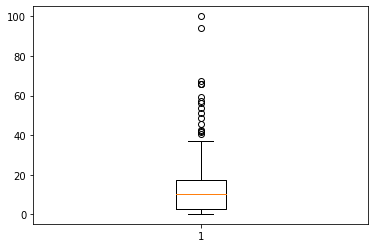

In [42]:
plt.boxplot(car_data['Selling_Price'])
# There appears to be 2 major outliers which we should drop 

In [43]:
car_data[car_data['Selling_Price'] > 80]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016
64,fortuner,2017,94.285714,39.12527,1.2,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,0
86,land cruiser,2010,100.000000,100.00000,15.6,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,1


In [44]:
car_data = car_data.drop(64, axis=0)

In [45]:
car_data = car_data.drop(86, axis=0)

In [46]:
car_data[car_data['Selling_Price'] > 80]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016


(array([113.,  73.,  55.,  29.,  12.,   2.,   5.,   3.,   3.,   4.]),
 array([ 0.28571429,  6.97142857, 13.65714286, 20.34285714, 27.02857143,
        33.71428571, 40.4       , 47.08571429, 53.77142857, 60.45714286,
        67.14285714]),
 <BarContainer object of 10 artists>)

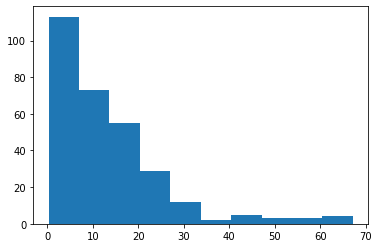

In [47]:
plt.hist(car_data['Selling_Price'])
# Negative skew

In [48]:
car_data['Present_Price'].aggregate(['min','max','median','mean'])
# Mean and median are close

min        0.345572
max       38.833693
median     6.587473
mean       7.827893
Name: Present_Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda10803640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda10803d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda108032b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda1080d4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda1080d850>],
 'means': []}

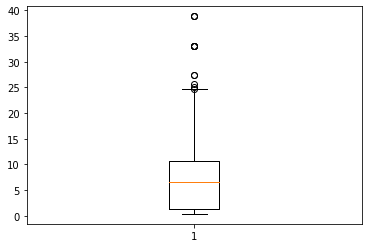

In [49]:
plt.boxplot(car_data['Present_Price'])
# Here we can see a few outliers

In [50]:
car_data[car_data['Present_Price'] > 35]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016
59,fortuner,2014,57.114286,38.833693,8.2,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,1
62,fortuner,2014,53.571429,38.833693,15.6,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,1
63,fortuner,2015,67.142857,38.833693,9.4,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,1


In [51]:
car_data = car_data.drop(59, axis=0)

In [52]:
car_data = car_data.drop(62, axis=0)

In [53]:
car_data = car_data.drop(63, axis=0)

In [54]:
car_data[car_data['Present_Price'] > 35]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016


(array([102.,  48.,  72.,  24.,  27.,   1.,  11.,   4.,   2.,   5.]),
 array([ 0.34557235,  3.61663067,  6.88768898, 10.1587473 , 13.42980562,
        16.70086393, 19.97192225, 23.24298056, 26.51403888, 29.78509719,
        33.05615551]),
 <BarContainer object of 10 artists>)

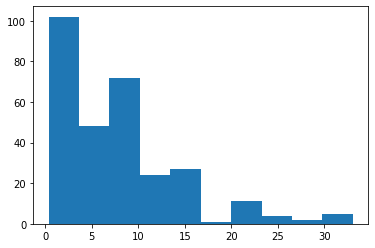

In [55]:
plt.hist(car_data['Present_Price'])
# Negative skew

In [56]:
car_data['Kms_Driven'].aggregate(['min','max','median','mean'])

min         0.100000
max       100.000000
median      6.360400
mean        7.345344
Name: Kms_Driven, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda10932ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda250ea400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda10932910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda250eab20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda250eaeb0>],
 'means': []}

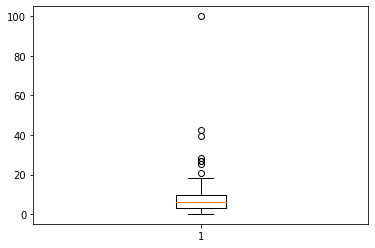

In [57]:
plt.boxplot(car_data['Kms_Driven'])
# Here we can see a few outliers

In [58]:
car_data[car_data['Kms_Driven'] > 30]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016
84,innova,2005,9.971429,14.535637,39.4352,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,1
179,Honda Karizma,2010,0.885714,1.133909,42.6000,Petrol,Individual,Manual,0,0,0,1,0,1,0,1,1
196,Activa 3g,2008,0.485714,0.561555,100.0000,Petrol,Individual,Automatic,0,0,0,1,1,0,0,1,1


In [59]:
car_data = car_data.drop(84, axis=0)

In [60]:
car_data = car_data.drop(179, axis=0)

In [61]:
car_data = car_data.drop(196, axis=0)

In [62]:
car_data[car_data['Kms_Driven'] > 30]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,< 2016


/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


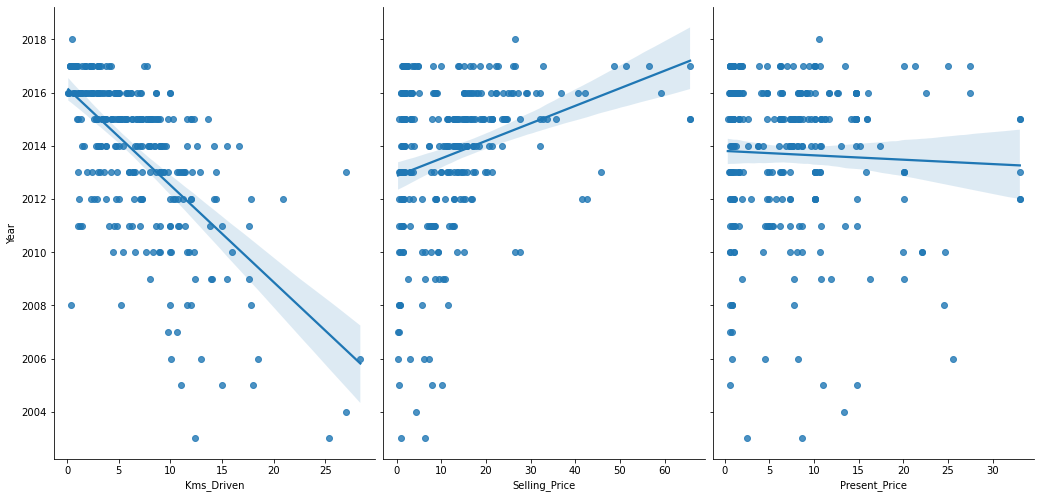

In [63]:
sns.pairplot(car_data, x_vars=['Kms_Driven', 'Selling_Price', 'Present_Price'], y_vars='Year', size = 7, aspect=0.7, kind='reg')
# The older the car, the more kms driven
# The newer the car, the higher the selling price

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


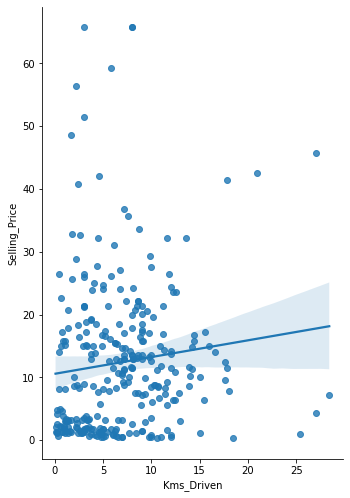

In [64]:
sns.pairplot(car_data, x_vars=['Kms_Driven'], y_vars='Selling_Price', size = 7, aspect=0.7, kind='reg')
# Positive correlation - The more kms driven, the higher the selling price

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


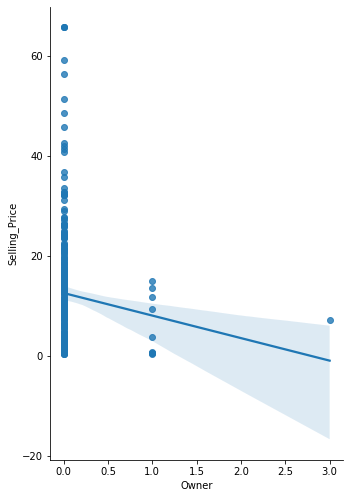

In [65]:
sns.pairplot(car_data, x_vars=['Owner'], y_vars='Selling_Price', size = 7, aspect=0.7, kind='reg')
# Negative correlation - The more owners, the lower the selling price 

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

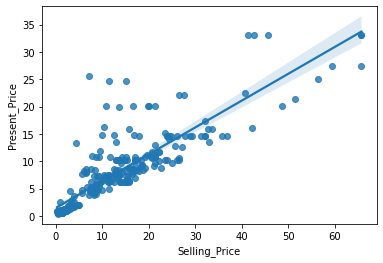

In [66]:
sns.regplot('Selling_Price','Present_Price',data=car_data)
# Strong positive relationship - The higher the present price, the higher the selling price

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Automatic', ylabel='Selling_Price'>

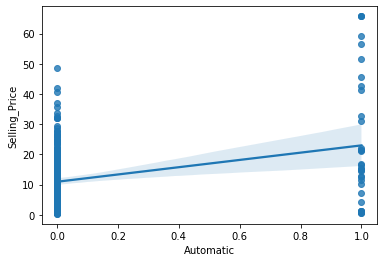

In [67]:
sns.regplot('Automatic','Selling_Price',data=car_data)
# Positive relationship

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Manual', ylabel='Selling_Price'>

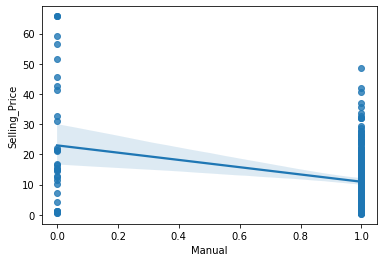

In [68]:
sns.regplot('Manual','Selling_Price',data=car_data)
# Negative relationship 

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

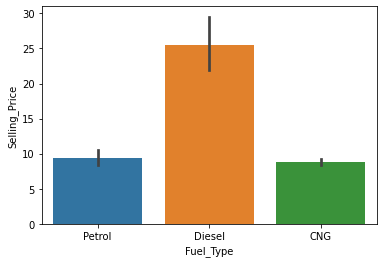

In [69]:
sns.barplot('Fuel_Type','Selling_Price',data=car_data)
# Cars with a fuel type of diesel sell the highest compared to Petrol and CNG

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

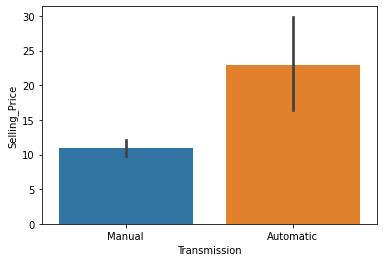

In [70]:
sns.barplot('Transmission','Selling_Price', data=car_data)
# The selling price for automatic cars is higher than that of manual cars

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

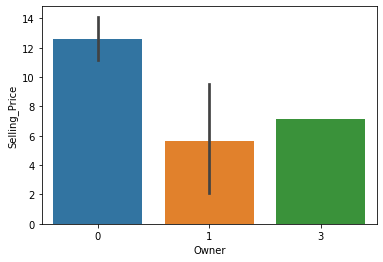

In [71]:
sns.barplot('Owner','Selling_Price', data=car_data)

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner', ylabel='Kms_Driven'>

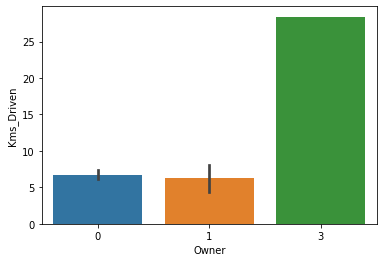

In [72]:
sns.barplot('Owner','Kms_Driven', data=car_data)
# Cars with 3 owners have driven the most kms

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='Kms_Driven'>

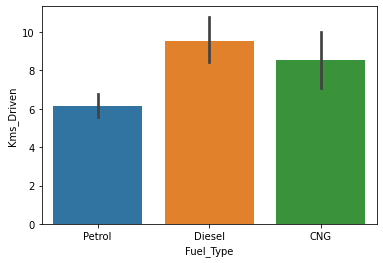

In [73]:
sns.barplot('Fuel_Type','Kms_Driven',data=car_data)
# Diesel cars have driven the most kms

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

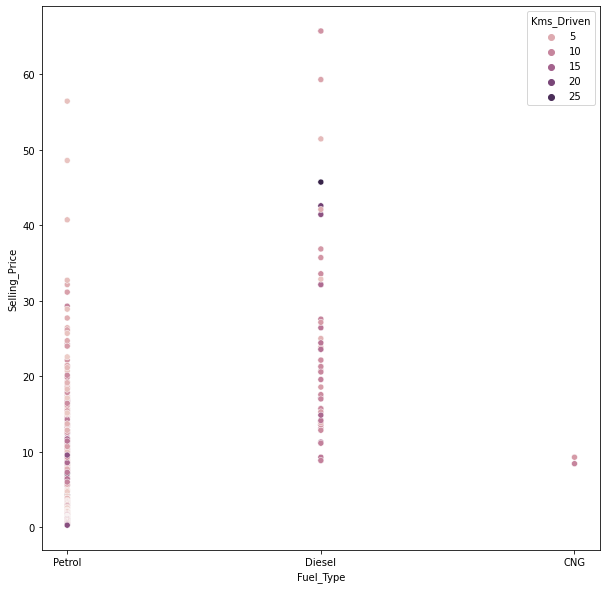

In [74]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=car_data['Fuel_Type'],y=car_data['Selling_Price'],hue=car_data['Kms_Driven'])
# It appears that diesel cars sell for the highest price even with relatively higher kms driven

### 6 (1 point) Based on the insights identified, state a hypothesis which you can test with a regression model.

Based on the insights found, the year the car was manufactured does not seem to influnce the 
present price. 
I want to find out what factors into the present price of a car.


Hypothesis:
- Present price and year have an impact on the selling price.
- Transmission has an impact on the selling price. 
- The lower the kms driven, the higher the selling price of the car.
- Diesel cars sell for a higher price than petrol and cng.
- Cars with 0 owners sell for higher than those with more than 0 owners perhaps because 0 owners have lower kms driven.

### 7 (5 points) Build a linear regression model based on your hypothesis. Interpret the results.

In [75]:
y = car_data['Selling_Price']
x = car_data[['Present_Price']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

# 'Present_Price' gives a very high variability of 0.745 R-squared
# The p-value is very low which means the variable Present_Price is statistically significant


/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     847.9
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           3.22e-88
Time:                        23:48:08   Log-Likelihood:                -943.85
No. Observations:                 293   AIC:                             1892.
Df Residuals:                     291   BIC:                             1899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9514      0.529      1.797      0.073      -0.090       1.993
Present_Price     1.5158      0.052     29.120      0.000       1.413       1.618
==============================================================================
Omnibus:                       68.162   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.941
Skew:                          -0.725   Prob(JB):                    5.45e-103
Kurtosis:                       9.039   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
y = car_data['Selling_Price']
x = car_data[['Present_Price', 'Year']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

# After adding the year variable, the adjusted R-squared value has gone up which means both variables make an impact on selling price
# The p-value is very low which means the variable Present_Price is statistically significant


/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     775.3
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          4.25e-117
Time:                        23:48:08   Log-Likelihood:                -873.03
No. Observations:                 293   AIC:                             1752.
Df Residuals:                     290   BIC:                             1763.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2664.4412    198.518    -13.422      0.000   -3055.160   -2273.723
Present_Price     1.5375      0.041     37.520      0.000       1.457       1.618
Year              1.3236      0.099     13.426      0.000       1.130       1.518
==============================================================================
Omnibus:                       41.619   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.946
Skew:                          -0.330   Prob(JB):                     1.07e-53
Kurtosis:                       7.421   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
y = car_data['Selling_Price']
x = car_data[['Present_Price', 'Year', 'Diesel']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

# I checked the variability for the 3 fuel types and diesel produces the highest variability
# The coefficient for diesel is also significant (around 4)
# The p-value remains very low 

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     574.2
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          2.18e-121
Time:                        23:48:08   Log-Likelihood:                -859.51
No. Observations:                 293   AIC:                             1727.
Df Residuals:                     289   BIC:                             1742.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2552.7470    191.067    -13.361      0.000   -2928.805   -2176.689
Present_Price     1.4322      0.044     32.571      0.000       1.346       1.519
Year              1.2681      0.095     13.366      0.000       1.081       1.455
Diesel            4.1040      0.776      5.286      0.000       2.576       5.632
==============================================================================
Omnibus:                       29.608   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.210
Skew:                          -0.045   Prob(JB):                     1.08e-32
Kurtosis:                       6.471   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
y = car_data['Selling_Price']
x = car_data[['Present_Price', 'Year', 'Diesel', 'Automatic']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()


# After adding the transmission type, the adjusted R-squared value hasn't changed
# Furthermore, the p-value is much greater than 0.05 which means the aimpact of transmission type is coincidental
# So although the coefficient of automatic cars is 0.8044 and for manual it is -0.8044,
# the transmission type variable is statistically insignificant to our model.

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          3.82e-120
Time:                        23:48:08   Log-Likelihood:                -859.11
No. Observations:                 293   AIC:                             1728.
Df Residuals:                     288   BIC:                             1747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2548.3928    191.195    -13.329      0.000   -2924.709   -2172.076
Present_Price     1.4152      0.048     29.539      0.000       1.321       1.510
Year              1.2660      0.095     13.334      0.000       1.079       1.453
Diesel            4.2110      0.786      5.358      0.000       2.664       5.758
Automatic         0.8044      0.900      0.894      0.372      -0.966       2.575
==============================================================================
Omnibus:                       30.928   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.290
Skew:                          -0.123   Prob(JB):                     1.90e-34
Kurtosis:                       6.558   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
y = car_data['Selling_Price']
x = car_data[['Present_Price', 'Year', 'Diesel', 'Kms_Driven']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

# The adjusted R-Squared value has gone up to 0.872
# The p-value is very low
# Therefore, kms driven is a statistically significant variable

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     497.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          5.93e-128
Time:                        23:48:08   Log-Likelihood:                -840.79
No. Observations:                 293   AIC:                             1692.
Df Residuals:                     288   BIC:                             1710.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1467.1518    249.526     -5.880      0.000   -1958.277    -976.027
Present_Price     1.5475      0.045     34.212      0.000       1.458       1.636
Year              0.7301      0.124      5.899      0.000       0.487       0.974
Diesel            5.1777      0.750      6.908      0.000       3.702       6.653
Kms_Driven       -0.4958      0.079     -6.265      0.000      -0.652      -0.340
==============================================================================
Omnibus:                       25.494   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.346
Skew:                          -0.170   Prob(JB):                     1.20e-21
Kurtosis:                       5.789   Cond. No.                     2.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
y = car_data['Selling_Price']
x = car_data[['Present_Price', 'Year', 'Diesel', 'Kms_Driven', 'Owner']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

# After adding the variable Owner, that adjusted R-squared has gone up further to 0.874
# However, the p-value is high at 0.026 which means the results are probably coincidental
# Therefore this variable will be dropped from the model

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     404.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          1.17e-127
Time:                        23:48:08   Log-Likelihood:                -838.25
No. Observations:                 293   AIC:                             1689.
Df Residuals:                     287   BIC:                             1711.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1418.4064    248.753     -5.702      0.000   -1908.017    -928.796
Present_Price     1.5486      0.045     34.473      0.000       1.460       1.637
Year              0.7060      0.123      5.721      0.000       0.463       0.949
Diesel            5.0706      0.746      6.798      0.000       3.602       6.539
Kms_Driven       -0.4837      0.079     -6.141      0.000      -0.639      -0.329
Owner            -2.2822      1.018     -2.242      0.026      -4.286      -0.278
==============================================================================
Omnibus:                       22.853   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.736
Skew:                          -0.110   Prob(JB):                     1.78e-18
Kurtosis:                       5.578   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
y = car_data['Selling_Price']
x = car_data[['Present_Price', 'Year', 'Diesel', 'Kms_Driven']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

# After adding the variable Owner, that adjusted R-squared has gone up further to 0.874
# However, the p-value is high at 0.026 which means the results are probably coincidental
# Therefore this variable will be dropped from the model

/Users/iswaryaah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     497.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          5.93e-128
Time:                        23:48:08   Log-Likelihood:                -840.79
No. Observations:                 293   AIC:                             1692.
Df Residuals:                     288   BIC:                             1710.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1467.1518    249.526     -5.880      0.000   -1958.277    -976.027
Present_Price     1.5475      0.045     34.212      0.000       1.458       1.636
Year              0.7301      0.124      5.899      0.000       0.487       0.974
Diesel            5.1777      0.750      6.908      0.000       3.702       6.653
Kms_Driven       -0.4958      0.079     -6.265      0.000      -0.652      -0.340
==============================================================================
Omnibus:                       25.494   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.346
Skew:                          -0.170   Prob(JB):                     1.20e-21
Kurtosis:                       5.789   Cond. No.                     2.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 8 (2 points) How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

Our model could be made better if we had a larger sample data set. 
To achieve a higher R2 value, we could perhaps look at seller location, colour and accident history. 